In [4]:
from pathlib import Path
from scipy.io import wavfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display


In [5]:
# leer los archivos y guardarlos
#kick_signals  => fallas
#snare_signals => sin fallas
fallas_signals = [
    librosa.load(p)[0] for p in Path().glob('training/conFalla.38*.wav')
]
sinfallas_signals = [
    librosa.load(p)[0] for p in Path().glob('training/SinFalla.38*.wav')
]
atipico_signals = [
    librosa.load(p)[0] for p in Path().glob('training/Atípico.noise.*.wav')
]

fallas_signals[0].dtype #Tipo de Dato


dtype('float32')

In [6]:
len(fallas_signals) + len(sinfallas_signals) + len(atipico_signals)


75

In [7]:
ipd.Audio('training/SinFalla.38fthuv5.ingestion-5cf64d4f64-rkqvz.s2.wav')
len(fallas_signals)


25

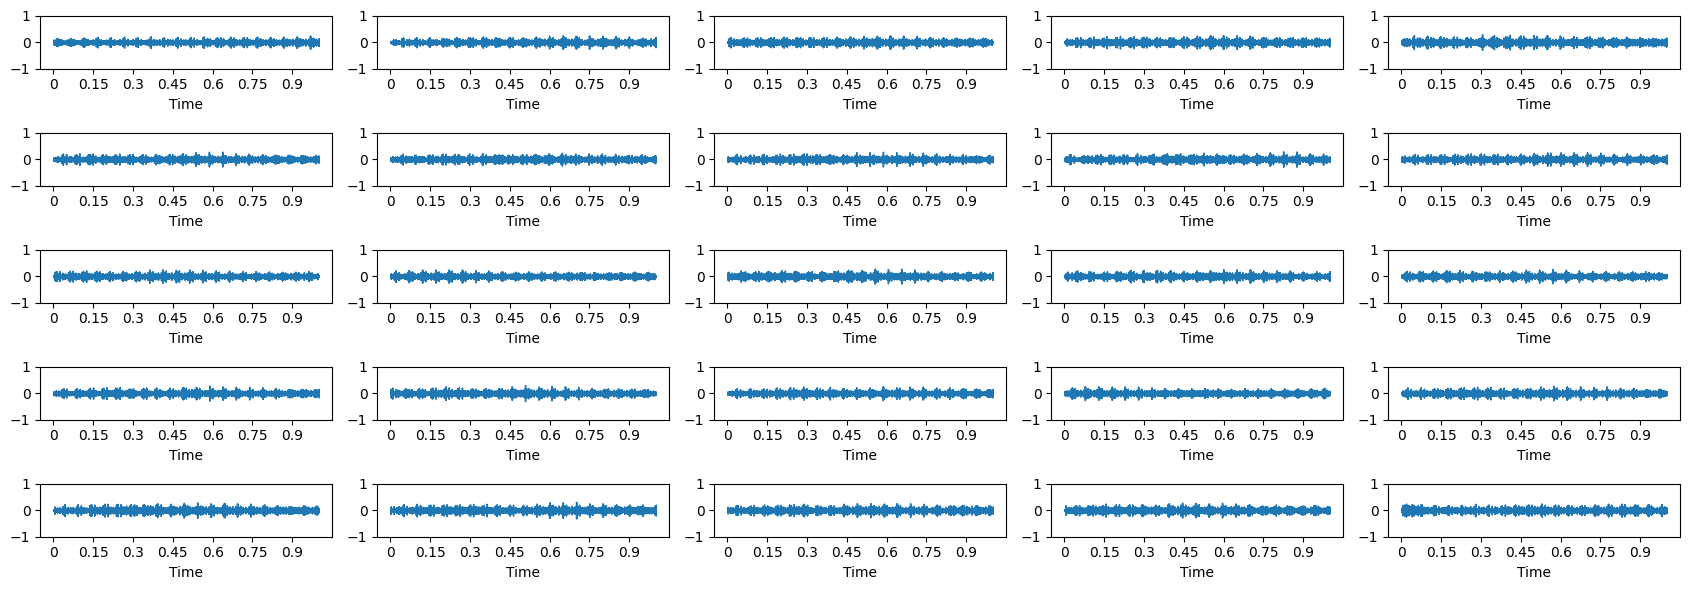

In [8]:
plt.figure(figsize=(17, 6))
for i, x in enumerate(fallas_signals):
    plt.subplot(5, 5, i+1)
    librosa.display.waveshow(x[:100000])
    plt.ylim(-1, 1)
    plt.tight_layout()

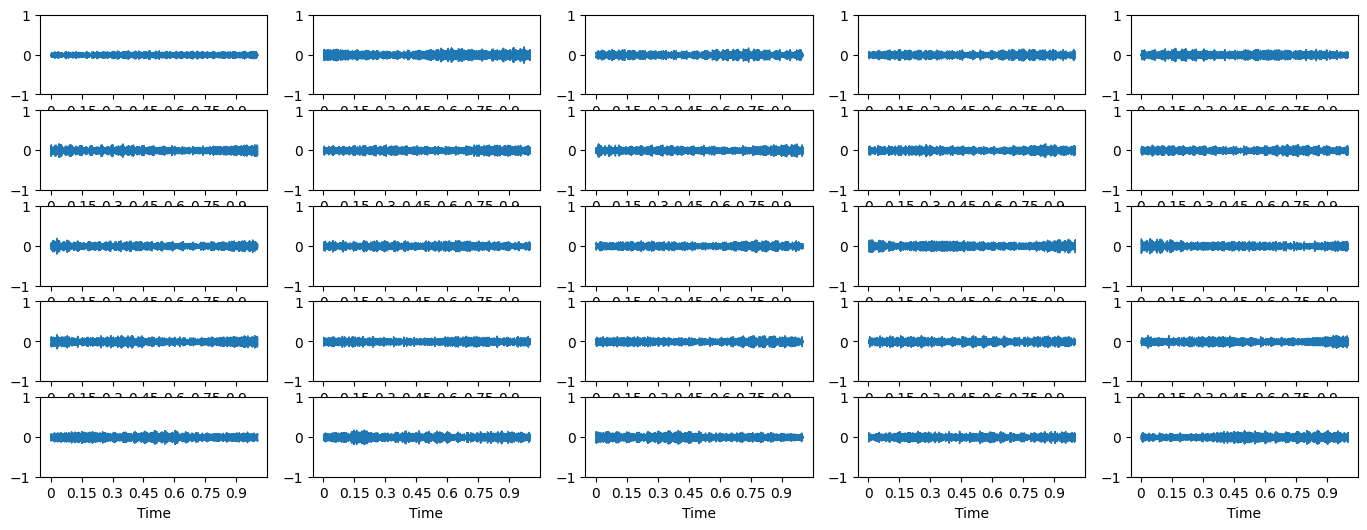

In [9]:
plt.figure(figsize=(17, 6))
for i, x in enumerate(sinfallas_signals):
    plt.subplot(5, 5, i+1)
    librosa.display.waveshow(x[:100000])
    plt.ylim(-1, 1)

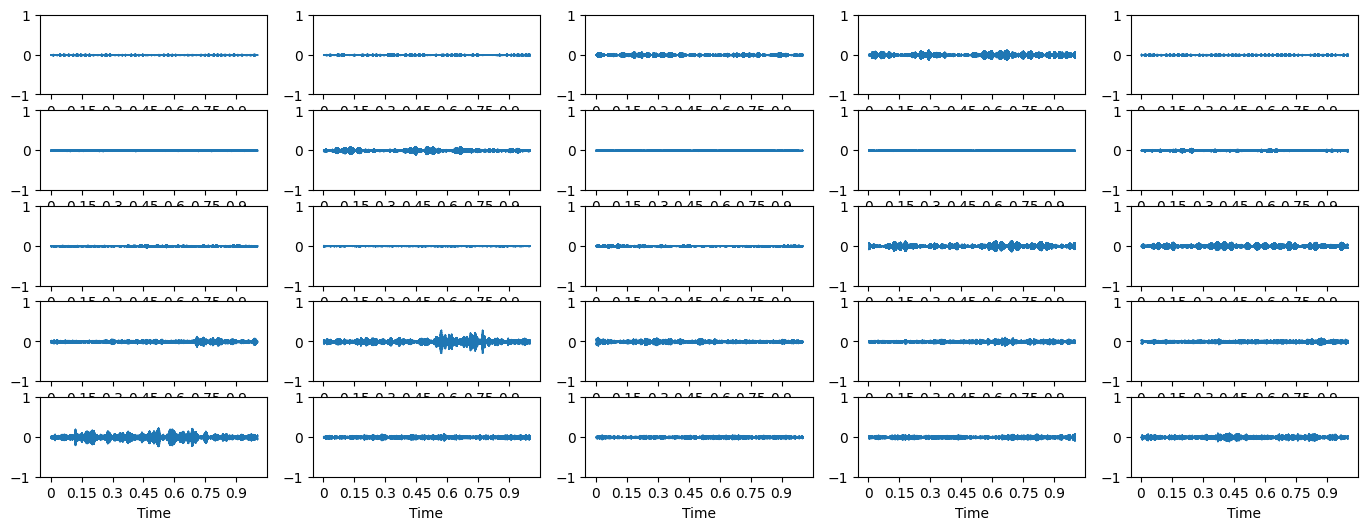

In [10]:
plt.figure(figsize=(17, 6))
for i, x in enumerate(atipico_signals):
    plt.subplot(5, 5, i+1)
    librosa.display.waveshow(x[:100000])
    plt.ylim(-1, 1)


In [12]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0], #Numero de cruces por cero
        librosa.feature.spectral_centroid(signal)[0, 0], # centroide del espectro
    ]

fallas_signals = np.array([extract_features(x) for x in fallas_signals])
sinfallas_signals = np.array([extract_features(x) for x in sinfallas_signals])
atipico_signals = np.array([extract_features(x) for x in atipico_signals])


C:\Users\jeanf\AppData\Local\Temp\ipykernel_236680\2249263154.py:4: FutureWarning: Pass y=[-0.08941863 -0.09495627 -0.06763835 ... -0.13292892 -0.14144368
 -0.08740885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.spectral_centroid(signal)[0, 0], # centroide del espectro
C:\Users\jeanf\AppData\Local\Temp\ipykernel_236680\2249263154.py:4: FutureWarning: Pass y=[ 0.01708419  0.01305413 -0.00093439 ... -0.00671885  0.00677442
  0.00841389] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.spectral_centroid(signal)[0, 0], # centroide del espectro
C:\Users\jeanf\AppData\Local\Temp\ipykernel_236680\2249263154.py:4: FutureWarning: Pass y=[0.00836148 0.01504303 0.02048905 ... 0.0024804  0.01371838 0.01296908] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.feature.spectral_centroid(signal)[0, 0], # cent

In [13]:
fallas_signals

array([[1.85546875e-02, 1.37747017e+03],
       [1.70898438e-02, 9.17942202e+02],
       [2.05078125e-02, 7.11888259e+02],
       [1.85546875e-02, 7.35293109e+02],
       [1.26953125e-02, 8.95097643e+02],
       [1.75781250e-02, 8.42864774e+02],
       [1.56250000e-02, 8.84901319e+02],
       [1.51367188e-02, 9.35013090e+02],
       [1.75781250e-02, 1.10214593e+03],
       [1.46484375e-02, 1.40772779e+03],
       [2.05078125e-02, 6.38068729e+02],
       [2.09960938e-02, 9.49986035e+02],
       [1.46484375e-02, 1.42439978e+03],
       [1.36718750e-02, 1.01386547e+03],
       [1.80664062e-02, 7.65112554e+02],
       [2.29492188e-02, 1.36693699e+03],
       [1.90429688e-02, 1.02696354e+03],
       [1.36718750e-02, 8.39172049e+02],
       [2.29492188e-02, 1.26196431e+03],
       [1.85546875e-02, 7.80604426e+02],
       [1.66015625e-02, 8.92551458e+02],
       [4.34570312e-02, 1.19344881e+03],
       [2.68554688e-02, 1.67990738e+03],
       [1.56250000e-02, 6.91158680e+02],
       [2.783203

In [14]:
sinfallas_signals

array([[1.85546875e-02, 1.18188904e+03],
       [2.34375000e-02, 8.36884860e+02],
       [2.53906250e-02, 8.58290933e+02],
       [1.80664062e-02, 8.89140192e+02],
       [2.24609375e-02, 8.75215215e+02],
       [3.07617188e-02, 1.74372296e+03],
       [2.00195312e-02, 1.16850441e+03],
       [2.63671875e-02, 1.09298001e+03],
       [2.58789062e-02, 1.62472092e+03],
       [2.29492188e-02, 1.31252116e+03],
       [2.92968750e-02, 9.39491863e+02],
       [2.53906250e-02, 9.42261778e+02],
       [2.39257812e-02, 1.58667049e+03],
       [2.34375000e-02, 1.57046444e+03],
       [2.73437500e-02, 1.73231972e+03],
       [1.66015625e-02, 7.39072982e+02],
       [2.92968750e-02, 9.43408198e+02],
       [1.90429688e-02, 1.29132215e+03],
       [2.19726562e-02, 9.76029567e+02],
       [2.44140625e-02, 7.75865529e+02],
       [2.34375000e-02, 1.17306115e+03],
       [2.83203125e-02, 9.41494820e+02],
       [3.17382812e-02, 1.56538645e+03],
       [2.05078125e-02, 1.35124287e+03],
       [2.001953

In [15]:
atipico_signals

array([[1.95312500e-03, 7.09886801e+02],
       [8.30078125e-03, 1.23081381e+03],
       [2.92968750e-03, 4.81705228e+02],
       [6.83593750e-03, 1.16574644e+03],
       [3.90625000e-03, 1.48615086e+03],
       [2.44140625e-03, 1.43580582e+03],
       [9.76562500e-04, 1.23198262e+03],
       [5.85937500e-03, 1.66331399e+03],
       [7.32421875e-03, 1.33091799e+03],
       [9.76562500e-04, 1.02303252e+03],
       [2.44140625e-02, 1.07683300e+03],
       [3.51562500e-02, 2.17860752e+03],
       [4.88281250e-03, 1.13005714e+03],
       [4.88281250e-04, 1.53887517e+03],
       [2.44140625e-03, 8.22147064e+02],
       [3.46679688e-02, 1.61889941e+03],
       [9.27734375e-03, 1.30952769e+03],
       [9.27734375e-03, 1.13787371e+03],
       [4.73632812e-02, 1.90918826e+03],
       [2.44140625e-02, 1.70586607e+03],
       [2.68554688e-02, 1.42149691e+03],
       [3.02734375e-02, 1.67609970e+03],
       [3.32031250e-02, 1.55285433e+03],
       [3.85742188e-02, 1.66816125e+03],
       [2.050781

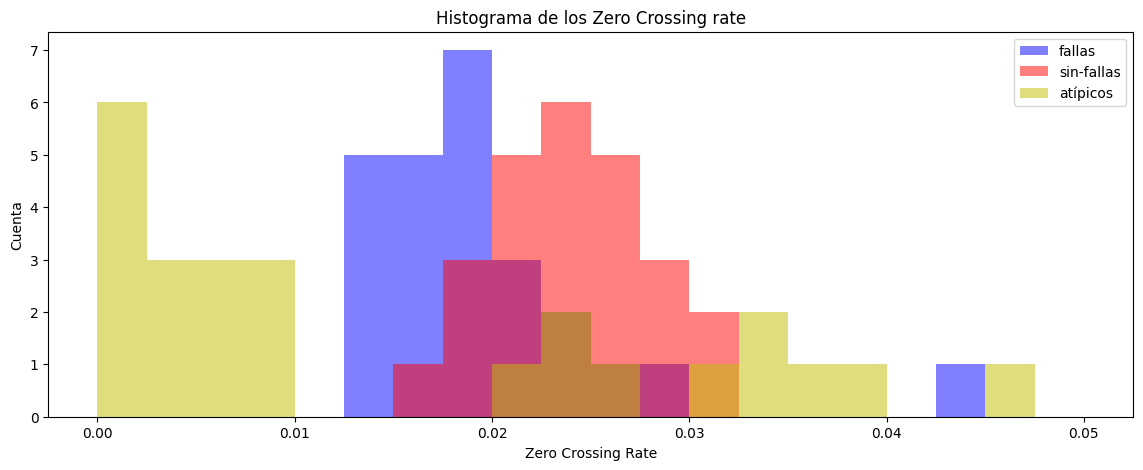

In [16]:
plt.figure(figsize=(14, 5))
plt.hist(fallas_signals[:,0], color='b', range=(0, 0.05), alpha=0.5, bins=20)
plt.hist(sinfallas_signals[:,0], color='r', range=(0, 0.05), alpha=0.5, bins=20)
plt.hist(atipico_signals[:,0], color='y', range=(0, 0.05), alpha=0.5, bins=20)
plt.legend(('fallas', 'sin-fallas', 'atípicos'))
plt.title('Histograma de los Zero Crossing rate')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Cuenta');



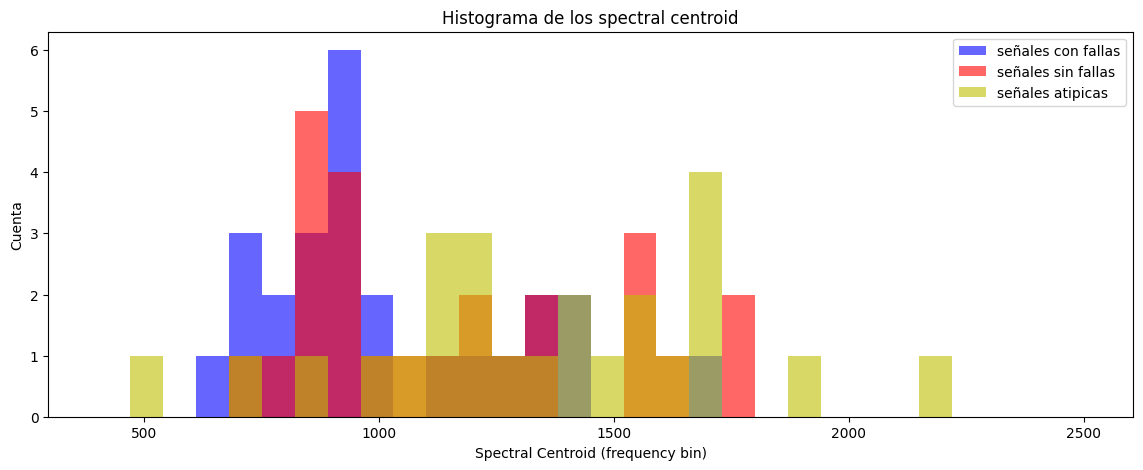

In [20]:
plt.figure(figsize=(14, 5))
plt.hist(fallas_signals[:,1], color='b', range=(400, 2500), bins=30, alpha=0.6)
plt.hist(sinfallas_signals[:,1], color='r', range=(400, 2500), bins=30, alpha=0.6)
plt.hist(atipico_signals[:,1], color='y', range=(400, 2500), bins=30, alpha=0.6)
plt.legend(('señales con fallas', 'señales sin fallas', 'señales atipicas'))
plt.title('Histograma de los spectral centroid')
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Cuenta');

In [21]:
x, sr = librosa.load('training/conFalla.38fuhh1f.s3.wav')  
sr

C:\Users\jeanf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: 'training/conFalla.38fuhh1f.s3.wav'

In [ ]:
x.shape # Tamaño


(22050,)

In [ ]:
librosa.get_duration(x, sr) # duracion


NameError: name 'sr' is not defined

In [ ]:
ipd.Audio(x, rate=sr)


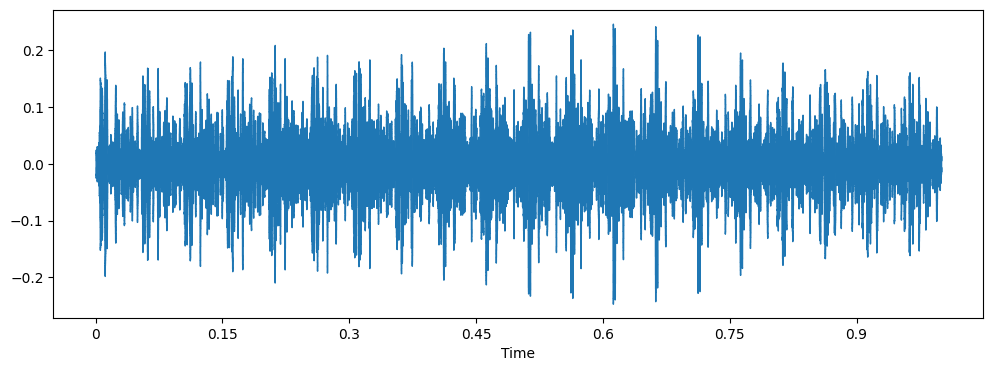

In [ ]:
import librosa.display
plt.figure(figsize=(12, 4))
librosa.display.waveshow(x, sr=sr)
